# RCIC - Basic EDA v1

Basic EDA of the train and test csv files for the Recursion Cellular Image Classification (RCIC) challenge on kaggle.

## Imports

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Unzip data and fix chmod

In [7]:
# list files in directory
!ls -lh

total 1,9G
-rw-rw-r-- 1 mmp mmp  18M Jun 28 15:29 pixel_stats.csv.zip
-rw-rw-r-- 1 mmp mmp 2,9K Jun 28 15:39 rcimc_eda_v1.ipynb
-rw-rw-r-- 1 mmp mmp  35K Jun 28 15:29 recursion_dataset_license.pdf
-rw-rw-r-- 1 mmp mmp 359K Jun 28 15:29 sample_submission.csv
-rw-rw-r-- 1 mmp mmp 112K Jun 28 15:29 test_controls.csv
-rw-rw-r-- 1 mmp mmp 562K Jun 28 15:29 test.csv
-rw-rw-r-- 1 mmp mmp 1,8G Jun 28 15:40 test.zip
-rw-rw-r-- 1 mmp mmp 204K Jun 28 15:29 train_controls.csv
-r--r--r-- 1 mmp mmp 1,2M Jun 26 08:01 train.csv
-rw-rw-r-- 1 mmp mmp 236K Jun 28 15:29 train.csv.zip


In [3]:
# unzip train.csv
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [6]:
# set chmod to read train.csv
!chmod +r train.csv

## Load data

In [188]:
# read csv data to pandas data frame
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## EDA for train and test data

In [189]:
# check for missing values
assert ~df_train.isnull().values.any()
assert ~df_test.isnull().values.any()

# check for NaN values
assert ~df_train.isna().values.any()
assert ~df_test.isna().values.any()

In [199]:
# check column name, non-null values and dtypes
print(df_train.info(),'\n')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36515 entries, 0 to 36514
Data columns (total 5 columns):
id_code       36515 non-null object
experiment    36515 non-null object
plate         36515 non-null int64
well          36515 non-null object
sirna         36515 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.4+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19897 entries, 0 to 19896
Data columns (total 4 columns):
id_code       19897 non-null object
experiment    19897 non-null object
plate         19897 non-null int64
well          19897 non-null object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB
None


In [144]:
# have a look at the first rows
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [192]:
df_test.head()

,id_code,experiment,plate,well
0,HEPG2-08_1_B03,HEPG2-08,1,B03
1,HEPG2-08_1_B04,HEPG2-08,1,B04
2,HEPG2-08_1_B05,HEPG2-08,1,B05
3,HEPG2-08_1_B06,HEPG2-08,1,B06
4,HEPG2-08_1_B07,HEPG2-08,1,B07


In [200]:
# cast every column to object and get the unique elements
print(df_train.astype('object').describe(include='all').loc['unique', :],'\n')
print(df_test.astype('object').describe(include='all').loc['unique', :])

id_code       36515
experiment       33
plate             4
well            277
sirna          1108
Name: unique, dtype: object 

id_code       19897
experiment       18
plate             4
well            277
Name: unique, dtype: object


The experiment count in the train and test set is different. We will look into this in more detail.

In [214]:
# get unique values of every column
col_values = [col for col in df_train]
unique_col_values_train = [df_train[col].unique() for col in df_train]
unique_col_values_test = [df_test[col].unique() for col in df_test]

In [275]:
# check if there are difference in the columns and if print them
for i, (c, a, b) in enumerate(zip(col_values, unique_col_values_train, unique_col_values_test)):
    
    if i == 0: continue # skip id_code
        
    a = set(a)
    b = set(b)
    
    print('\n'+c+':', a == b)
    
    # if the column elements are not equal, check if they are disjoint
    if not(a == b):
        print('disjoint:', a.isdisjoint(b))


experiment: False
disjoint: True

plate: True

well: True


Based on this result, we can derive that the train and test dataset are based on different experiments.

## Visual EDA train dataset

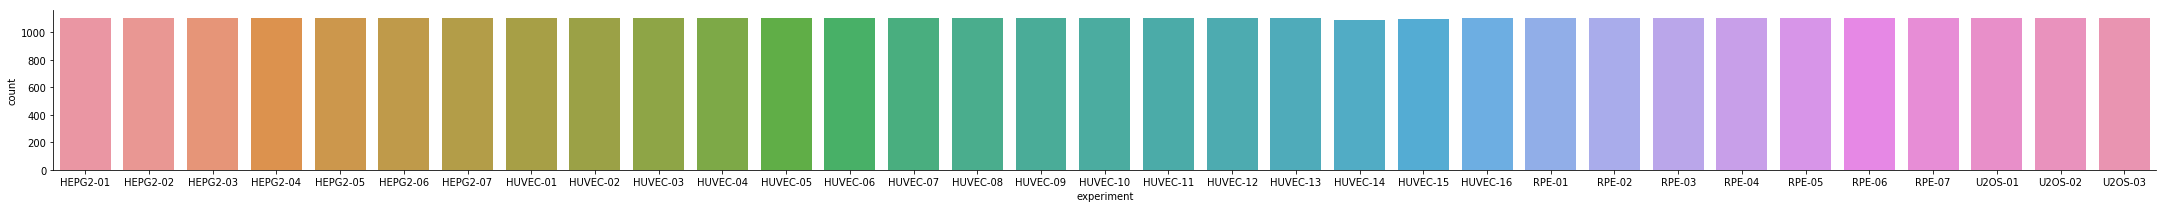

In [178]:
sns.catplot(x='experiment', kind='count', data=df_train, height=3, aspect=10);

The dataset count for all the experiments is comparable.

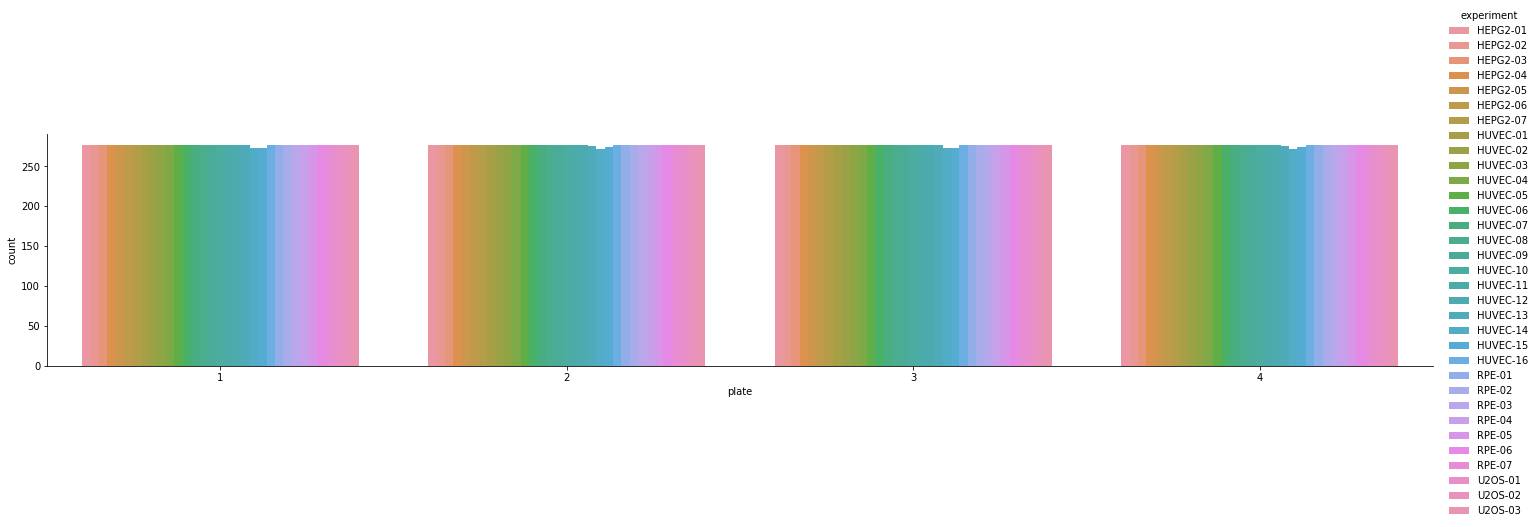

In [175]:
sns.catplot(x='plate', hue='experiment', kind='count', data=df_train, height=4, aspect=5);

In every experiment we have 4 plates and the count is evenly distributed.

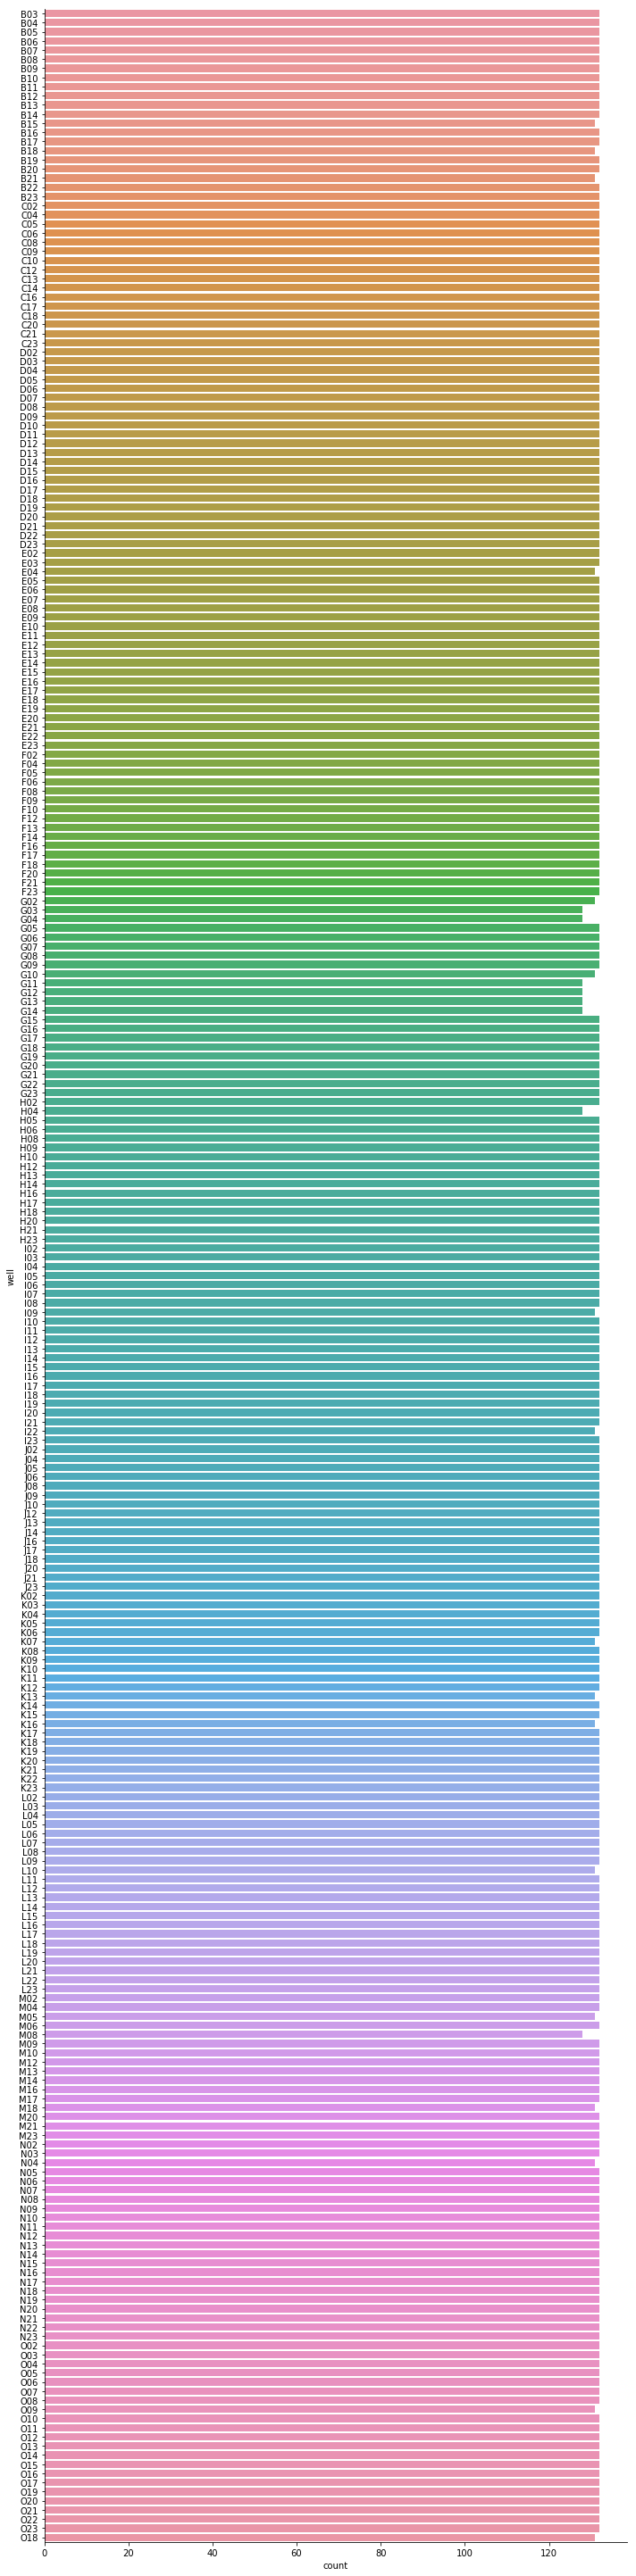

In [129]:
sns.catplot(y='well', kind='count', data=df_train, height=40, aspect=0.25);

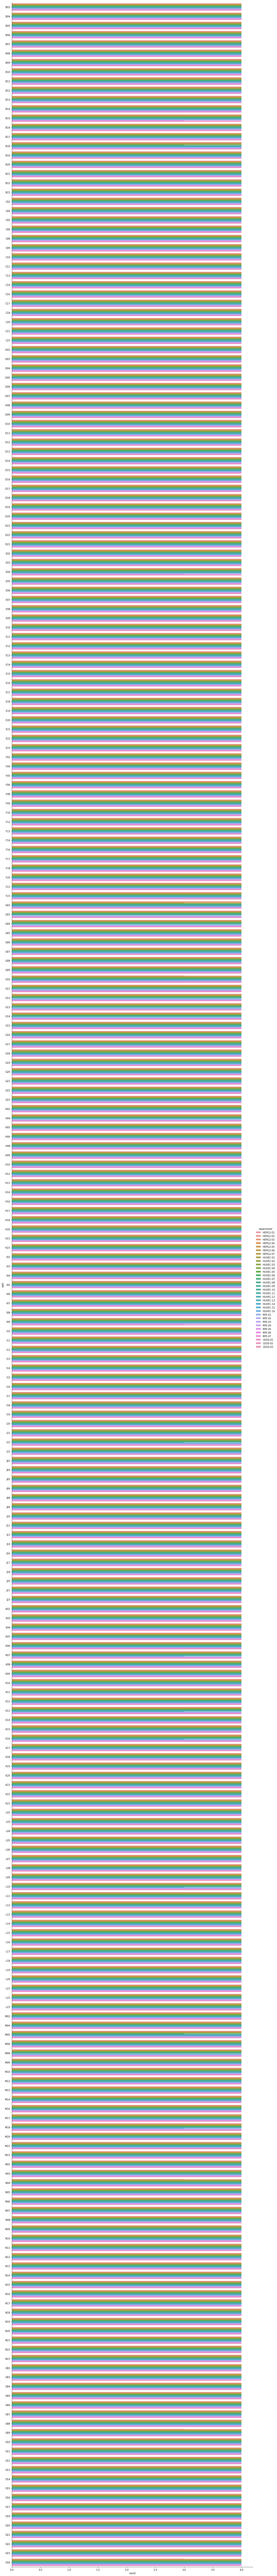

In [179]:
sns.catplot(y='well', hue='experiment', kind='count', data=df_train, height=150, aspect=0.1);

In general, the wells are evenly distributed. However, some wells are not present in every experiment, i.e., G3, G4, G11, G12, M08. (Note: If a experiment is not present in the first or the last position it can be tricky to see it in the visualisation due to the white background.)

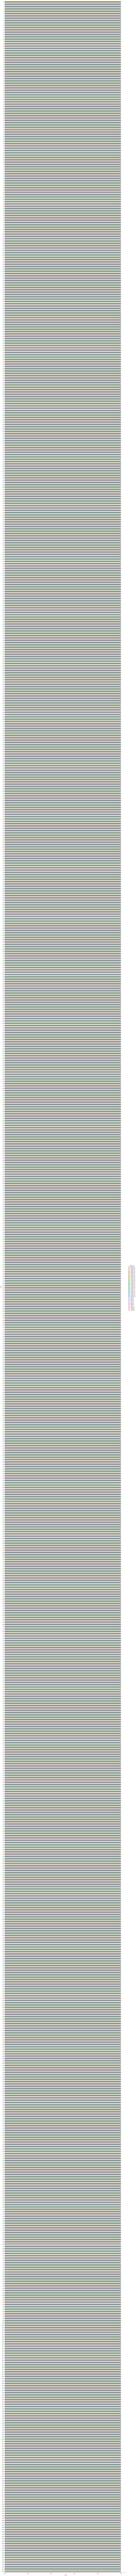

In [180]:
sns.catplot(y='sirna', hue='experiment', kind='count', data=df_train, height=400, aspect=0.05);

The siRNA data looks also very balanced. Nevertheless, some siRNAs were not used in every experiment.

## Visual EDA test dataset

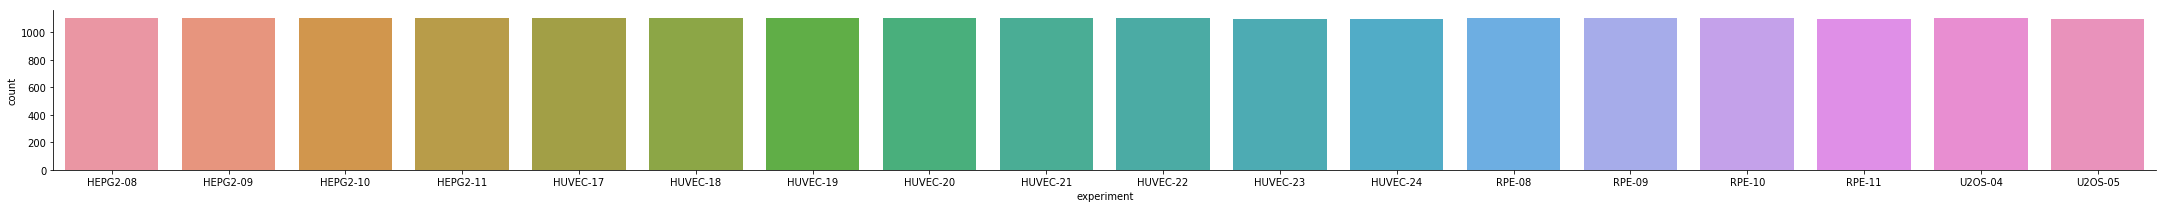

In [202]:
sns.catplot(x='experiment', kind='count', data=df_test, height=3, aspect=10);

The data set count for all the experiments is comparable.

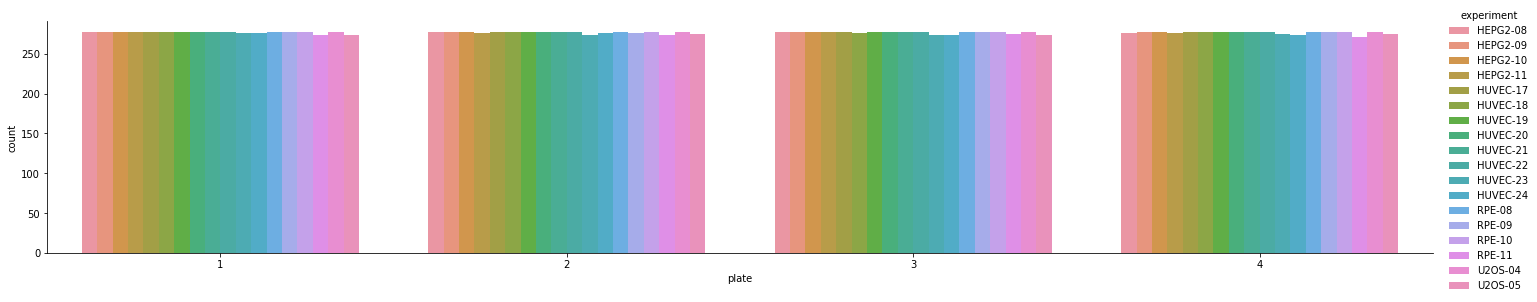

In [203]:
sns.catplot(x='plate', hue='experiment', kind='count', data=df_test, height=4, aspect=5);

In every experiment we have 4 plates. The count is evenly distributed.

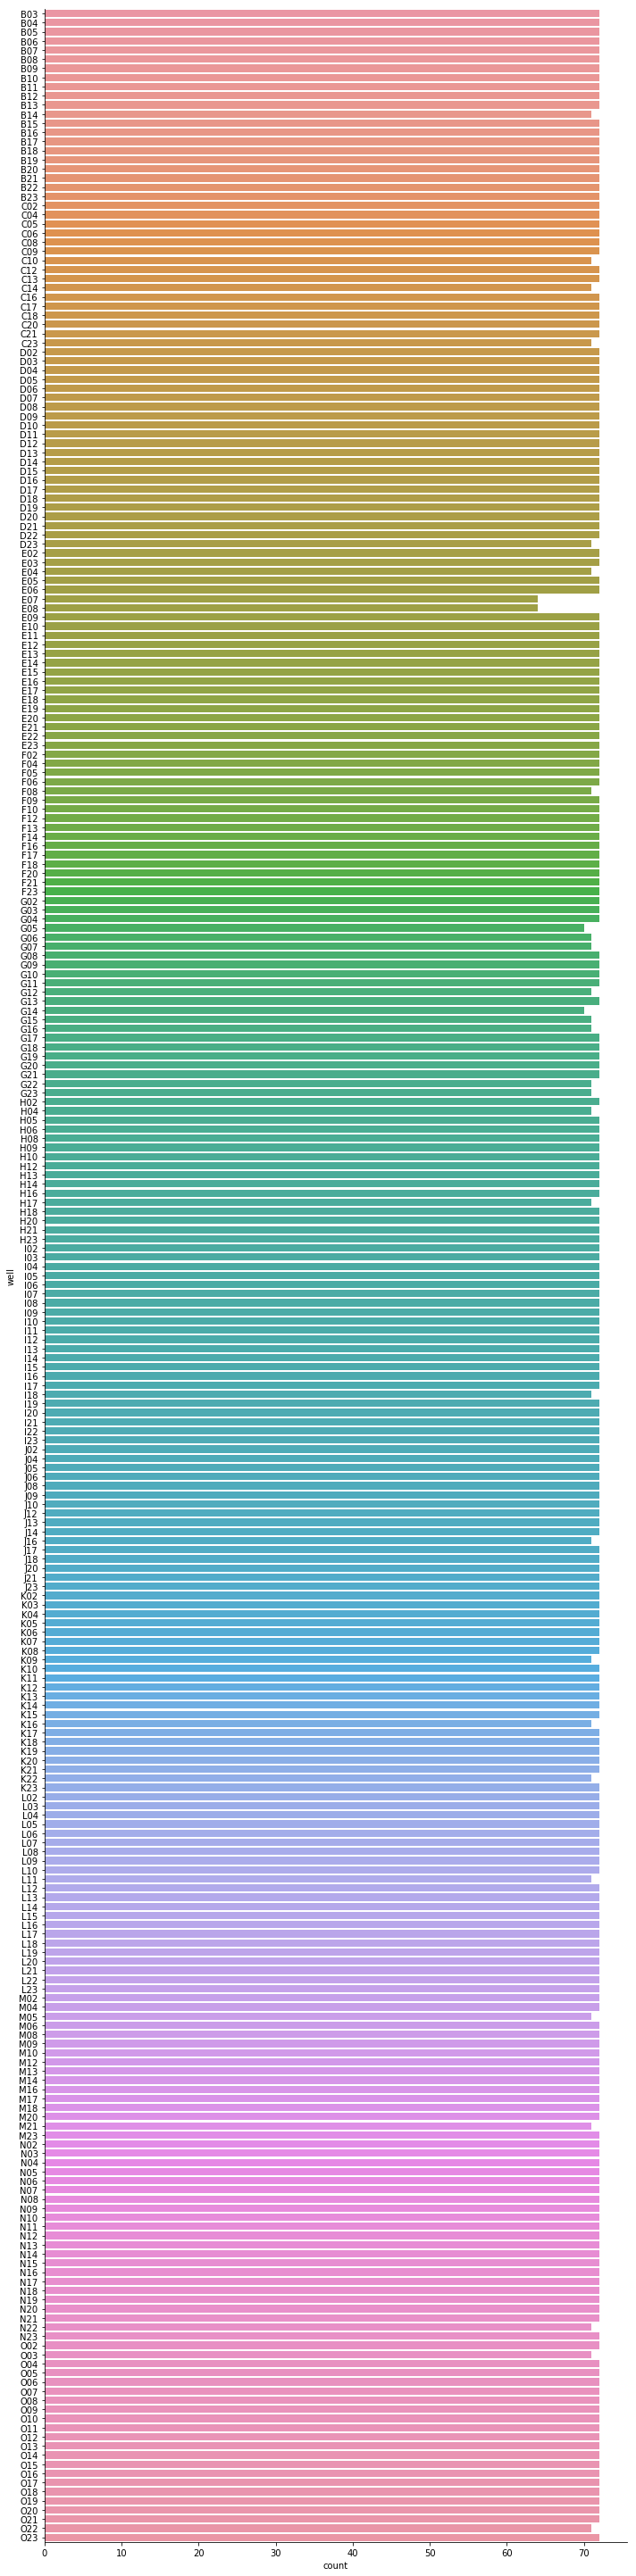

In [204]:
sns.catplot(y='well', kind='count', data=df_test, height=40, aspect=0.25);

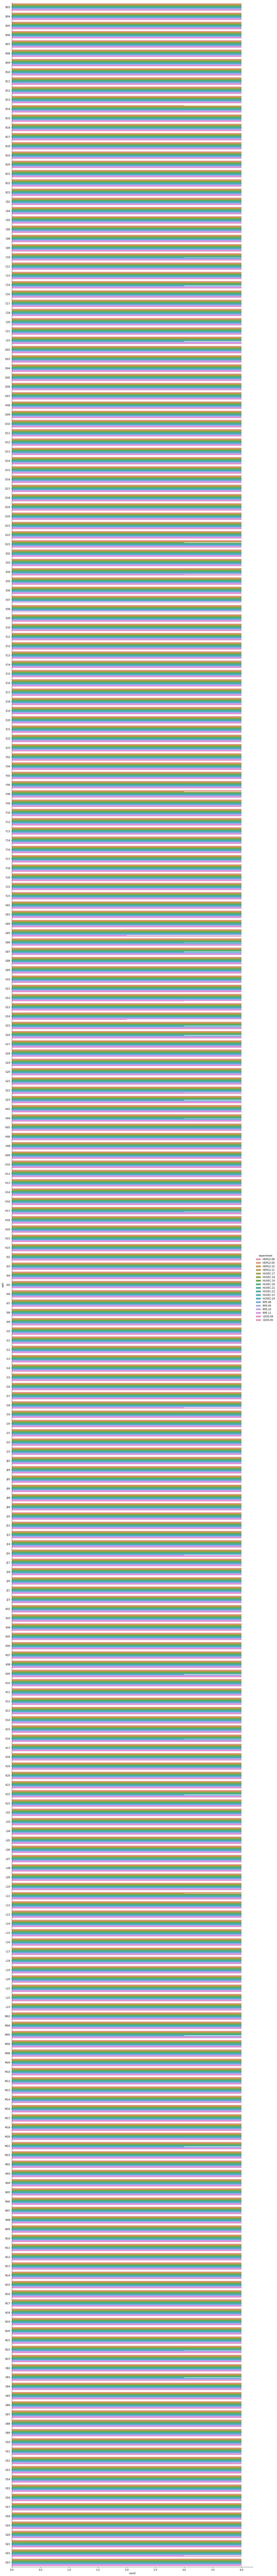

In [205]:
sns.catplot(y='well', hue='experiment', kind='count', data=df_test, height=150, aspect=0.1);

In general, the wells are evenly distributed. However, some wells are not present in certain experiments.

# Conclusion

The train and test dataset contain different experiments. All in all, the train and test dataset looks very balanced.